C:\Users\knowd\AppData\Local\Temp\ipykernel_22056\3770046745.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


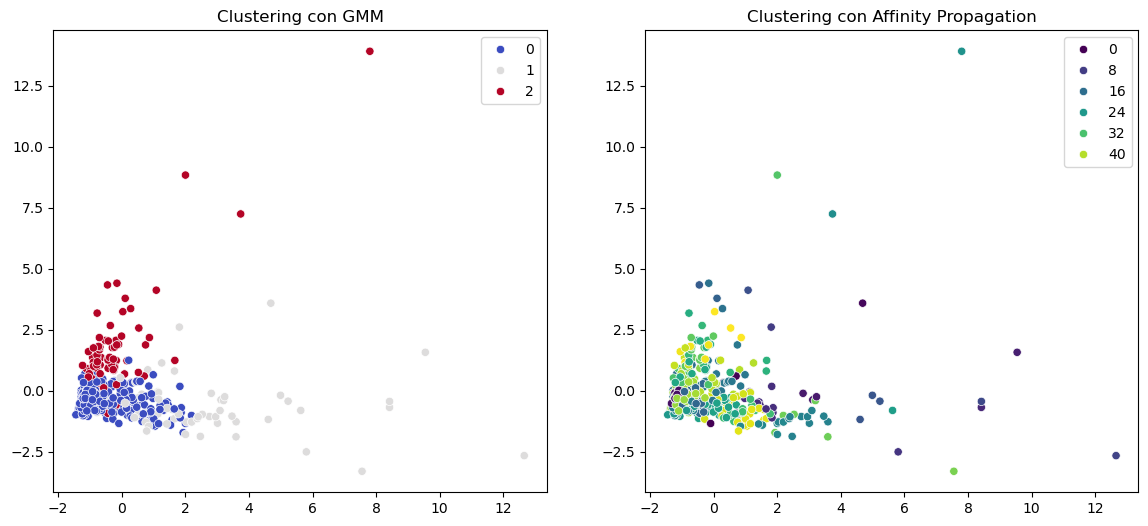

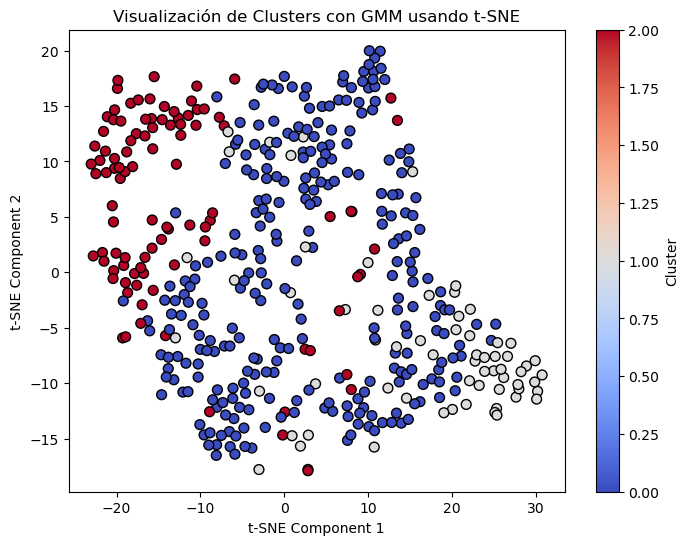

Archivos con clusters GMM y Affinity Propagation guardados exitosamente.


'\nüìå **Conclusiones:**\n- **GMM y Affinity Propagation permiten modelar patrones de compra m√°s complejos** que K-Means.\n- **Los gr√°ficos PCA y t-SNE permiten analizar visualmente los clusters generados**.\n- **Los resultados pueden ser usados para estrategias de segmentaci√≥n de clientes en Retail y HoReCa.**\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

"""
üìå **An√°lisis de Segmentaci√≥n de Clientes (B2B vs. B2C) usando M√©todos No Supervisados**
Este c√≥digo aplica t√©cnicas de clustering para segmentar clientes de datos mayoristas (B2B) y minoristas (B2C), incluyendo **GMM** y **Affinity Propagation**.
"""

# Cargar el conjunto de datos de Wholesale Customers (descargar manualmente si hay errores)
url_wholesale = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data_wholesale = pd.read_csv(url_wholesale)

# Cargar el conjunto de datos de DataMarket (descargar manualmente si es necesario)
url_datamarket = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
data_datamarket = pd.read_csv(url_datamarket)

# Selecci√≥n de columnas num√©ricas y manejo de valores faltantes
data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')

# Escalar los datos por separado
scaler_wholesale = StandardScaler()
data_wholesale_scaled = scaler_wholesale.fit_transform(data_wholesale.drop(columns=['Channel', 'Region']))
scaler_datamarket = StandardScaler()
data_datamarket_scaled = scaler_datamarket.fit_transform(data_datamarket_numerical)

# Asegurar que ambas matrices tengan la misma cantidad de muestras
min_rows = min(len(data_wholesale_scaled), len(data_datamarket_scaled))
data_wholesale_scaled = data_wholesale_scaled[:min_rows]
data_datamarket_scaled = data_datamarket_scaled[:min_rows]
data_wholesale_limited = data_wholesale.iloc[:min_rows].copy()
data_datamarket_limited = data_datamarket.iloc[:min_rows].copy()

# Unir ambos datasets
merged_data = np.concatenate((data_wholesale_scaled, data_datamarket_scaled), axis=1)

# Aplicar Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(merged_data)

# Aplicar Affinity Propagation
affinity_propagation = AffinityPropagation(random_state=42)
affinity_labels = affinity_propagation.fit_predict(merged_data)

# Aplicar PCA para reducci√≥n de dimensionalidad
pca = PCA(n_components=2)
merged_pca = pca.fit_transform(merged_data)

# Visualizar los clusters generados por GMM y Affinity Propagation
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# GMM
sns.scatterplot(x=merged_pca[:, 0], y=merged_pca[:, 1], hue=gmm_labels, palette="coolwarm", ax=axes[0])
axes[0].set_title("Clustering con GMM")

# Affinity Propagation
sns.scatterplot(x=merged_pca[:, 0], y=merged_pca[:, 1], hue=affinity_labels, palette="viridis", ax=axes[1])
axes[1].set_title("Clustering con Affinity Propagation")

plt.show()

# Aplicar t-SNE para visualizaci√≥n avanzada
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(merged_data)

plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=gmm_labels, cmap='coolwarm', s=50, edgecolor='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Visualizaci√≥n de Clusters con GMM usando t-SNE')
plt.colorbar(label='Cluster')
plt.show()

# Guardar etiquetas en los datasets originales
data_wholesale_limited['Cluster_GMM'] = gmm_labels
data_datamarket_limited['Cluster_GMM'] = gmm_labels
data_wholesale_limited['Cluster_Affinity'] = affinity_labels
data_datamarket_limited['Cluster_Affinity'] = affinity_labels

# Exportar resultados a CSV
data_wholesale_limited.to_csv('wholesale_clusters_gmm_affinity.csv', index=False)
data_datamarket_limited.to_csv('datamarket_clusters_gmm_affinity.csv', index=False)

print("Archivos con clusters GMM y Affinity Propagation guardados exitosamente.")

"""
üìå **Conclusiones:**
- **GMM y Affinity Propagation permiten modelar patrones de compra m√°s complejos** que K-Means.
- **Los gr√°ficos PCA y t-SNE permiten analizar visualmente los clusters generados**.
- **Los resultados pueden ser usados para estrategias de segmentaci√≥n de clientes en Retail y HoReCa.**
"""


C:\Users\knowd\AppData\Local\Temp\ipykernel_22056\4248649151.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')
C:\Users\knowd\AppData\Local\Temp\ipykernel_22056\4248649151.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], palette="coolwarm")


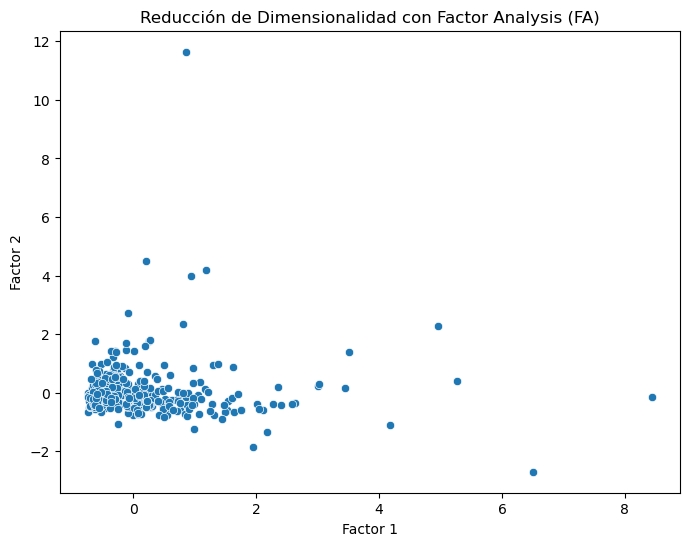

C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


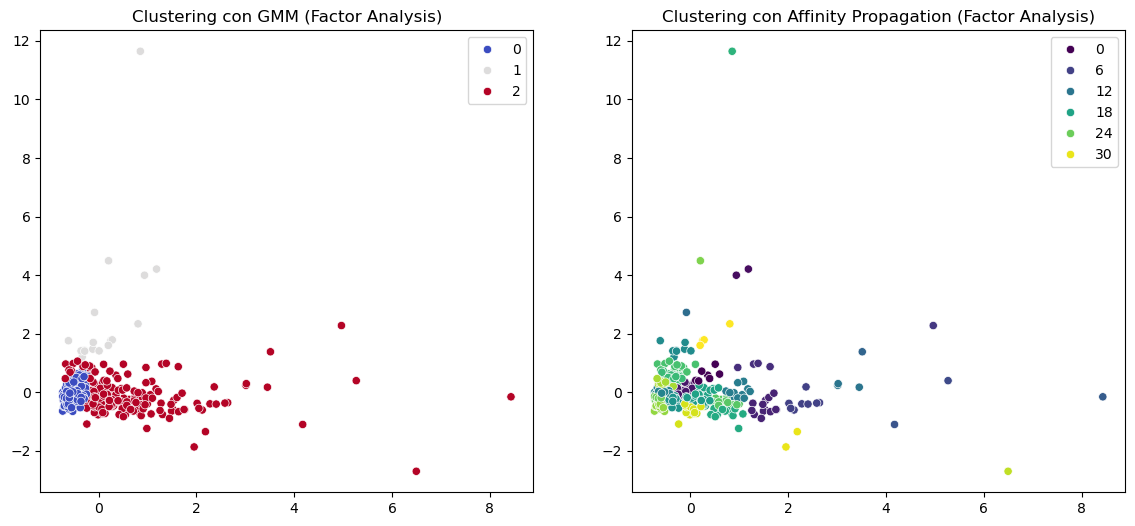

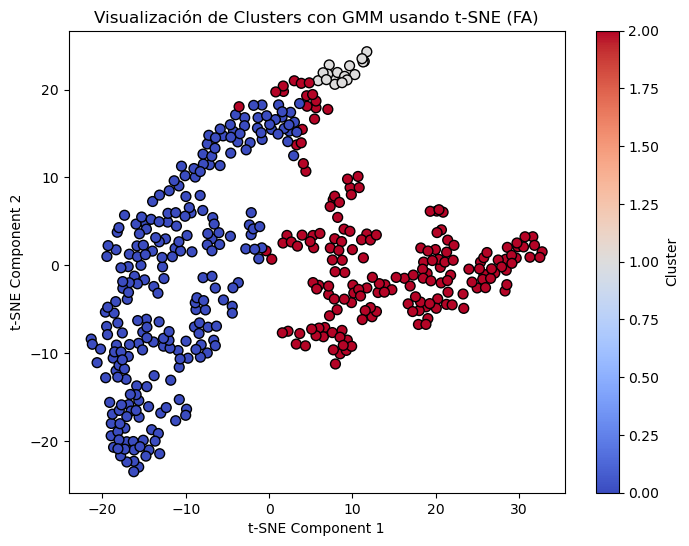

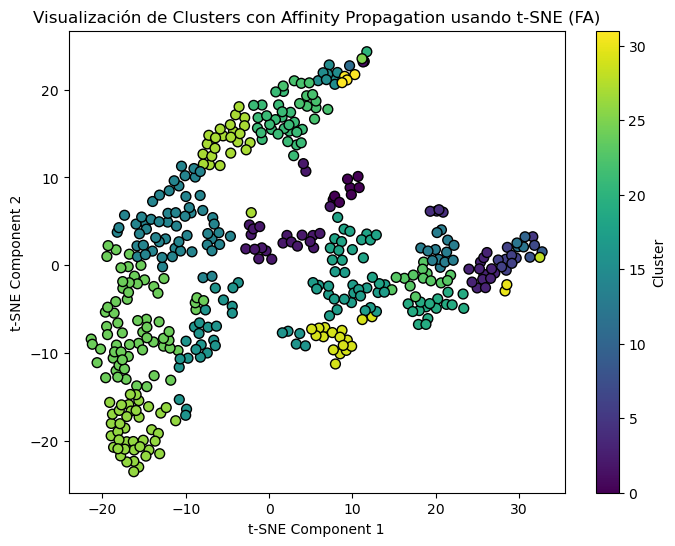

‚úÖ Archivos con clusters corregidos guardados exitosamente.


'\nüìå **Conclusiones:**\n- **Factor Analysis (FA) extrae factores latentes de los datos, mejorando la segmentaci√≥n.**\n- **GMM encuentra clusters flexibles basados en distribuciones probabil√≠sticas.**\n- **Affinity Propagation detecta segmentos autom√°ticamente sin definir el n√∫mero de clusters.**\n- **Las visualizaciones con PCA, FA y t-SNE permiten comparar los m√©todos y evaluar la segmentaci√≥n.**\n'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.manifold import TSNE

"""
üìå **Segmentaci√≥n de Clientes con Factor Analysis (FA), GMM y Affinity Propagation**
Este c√≥digo aplica **Factor Analysis (FA)** para reducci√≥n de dimensionalidad y luego **GMM y Affinity Propagation** para segmentar clientes en los datasets **Wholesale Customers** y **DataMarket**.
"""

# 1Ô∏è‚É£ Cargar los conjuntos de datos
url_wholesale = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data_wholesale = pd.read_csv(url_wholesale)

url_datamarket = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
data_datamarket = pd.read_csv(url_datamarket)

# 2Ô∏è‚É£ Selecci√≥n de columnas num√©ricas y manejo de valores faltantes en DataMarket
data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')

# 3Ô∏è‚É£ Normalizaci√≥n de datos
scaler_wholesale = StandardScaler()
data_wholesale_scaled = scaler_wholesale.fit_transform(data_wholesale.drop(columns=['Channel', 'Region']))

scaler_datamarket = StandardScaler()
data_datamarket_scaled = scaler_datamarket.fit_transform(data_datamarket_numerical)

# 4Ô∏è‚É£ Asegurar que ambas matrices tengan la misma cantidad de muestras
min_rows = min(len(data_wholesale_scaled), len(data_datamarket_scaled))
data_wholesale_scaled = data_wholesale_scaled[:min_rows]
data_datamarket_scaled = data_datamarket_scaled[:min_rows]

# 5Ô∏è‚É£ Unir ambos datasets
merged_data = np.concatenate((data_wholesale_scaled, data_datamarket_scaled), axis=1)

# 6Ô∏è‚É£ Aplicar Factor Analysis (FA) para reducci√≥n de dimensionalidad
fa = FactorAnalysis(n_components=2)
merged_fa = fa.fit_transform(merged_data)

# 7Ô∏è‚É£ Visualizar la reducci√≥n de dimensionalidad con FA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], palette="coolwarm")
plt.title("Reducci√≥n de Dimensionalidad con Factor Analysis (FA)")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.show()

# 8Ô∏è‚É£ Aplicar Gaussian Mixture Model (GMM) con los datos reducidos por FA
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(merged_fa)

# 9Ô∏è‚É£ Aplicar Affinity Propagation con los datos reducidos por FA
affinity_propagation = AffinityPropagation(random_state=42)
affinity_labels = affinity_propagation.fit_predict(merged_fa)

# üîü Visualizaci√≥n de clusters con FA
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=gmm_labels, palette="coolwarm", ax=axes[0])
axes[0].set_title("Clustering con GMM (Factor Analysis)")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=affinity_labels, palette="viridis", ax=axes[1])
axes[1].set_title("Clustering con Affinity Propagation (Factor Analysis)")

plt.show()

# 1Ô∏è‚É£1Ô∏è‚É£ Aplicar t-SNE para visualizaci√≥n avanzada
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(merged_fa)

plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=gmm_labels, cmap='coolwarm', s=50, edgecolor='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Visualizaci√≥n de Clusters con GMM usando t-SNE (FA)')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=affinity_labels, cmap='viridis', s=50, edgecolor='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Visualizaci√≥n de Clusters con Affinity Propagation usando t-SNE (FA)')
plt.colorbar(label='Cluster')
plt.show()

# 1Ô∏è‚É£2Ô∏è‚É£ üîπ **Correcci√≥n del error de longitud**
# Ajustar el n√∫mero de filas de los datasets para que coincida con merged_fa antes de asignar etiquetas
data_wholesale_limited = data_wholesale.iloc[:len(merged_fa)].copy()
data_datamarket_limited = data_datamarket.iloc[:len(merged_fa)].copy()

# 1Ô∏è‚É£3Ô∏è‚É£ Guardar etiquetas en los datasets corregidos
data_wholesale_limited['Cluster_GMM'] = gmm_labels
data_datamarket_limited['Cluster_GMM'] = gmm_labels
data_wholesale_limited['Cluster_Affinity'] = affinity_labels
data_datamarket_limited['Cluster_Affinity'] = affinity_labels

# 1Ô∏è‚É£4Ô∏è‚É£ Exportar resultados a CSV
data_wholesale_limited.to_csv('wholesale_clusters_fa_gmm_affinity.csv', index=False)
data_datamarket_limited.to_csv('datamarket_clusters_fa_gmm_affinity.csv', index=False)

print("‚úÖ Archivos con clusters corregidos guardados exitosamente.")

"""
üìå **Conclusiones:**
- **Factor Analysis (FA) extrae factores latentes de los datos, mejorando la segmentaci√≥n.**
- **GMM encuentra clusters flexibles basados en distribuciones probabil√≠sticas.**
- **Affinity Propagation detecta segmentos autom√°ticamente sin definir el n√∫mero de clusters.**
- **Las visualizaciones con PCA, FA y t-SNE permiten comparar los m√©todos y evaluar la segmentaci√≥n.**
"""


C:\Users\knowd\AppData\Local\Temp\ipykernel_22056\3521852889.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans

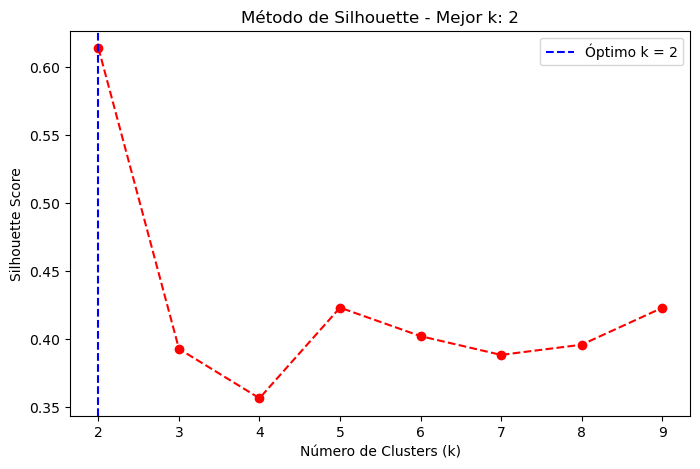

üîπ El n√∫mero √≥ptimo de clusters seg√∫n Silhouette Score es: 2


C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


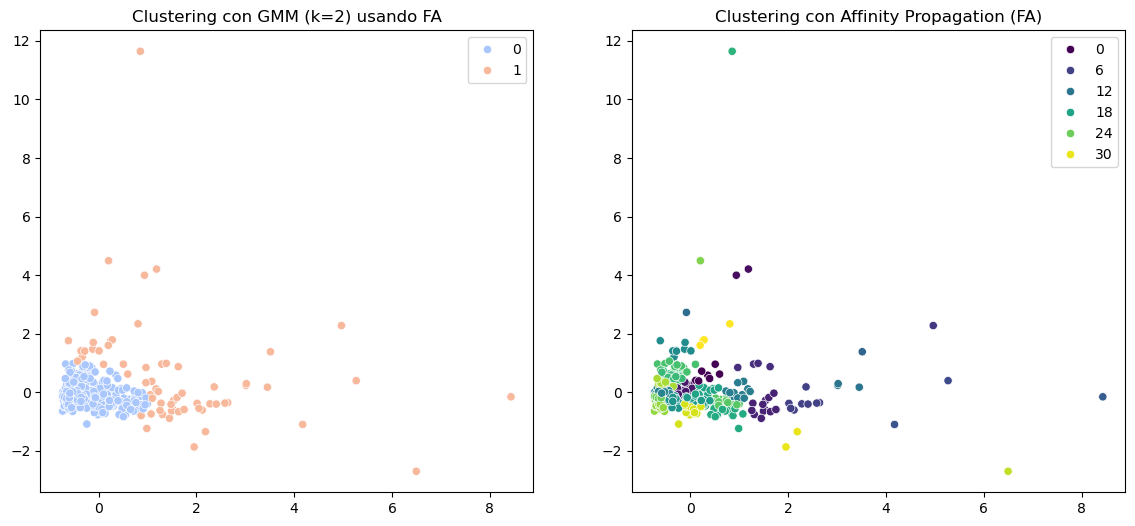

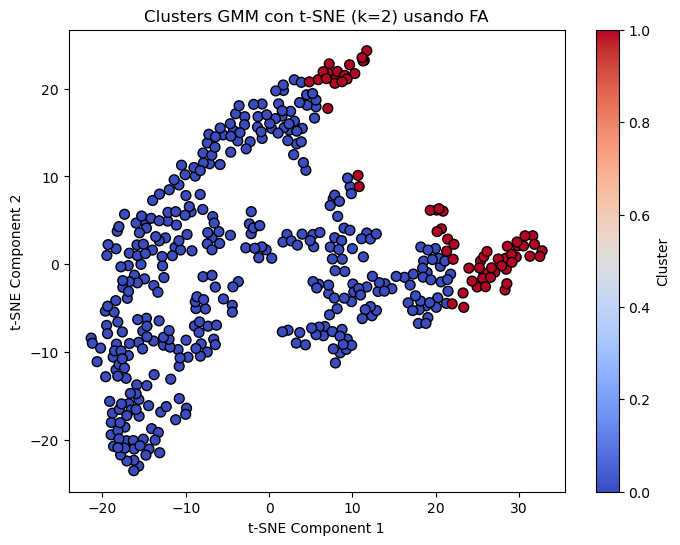

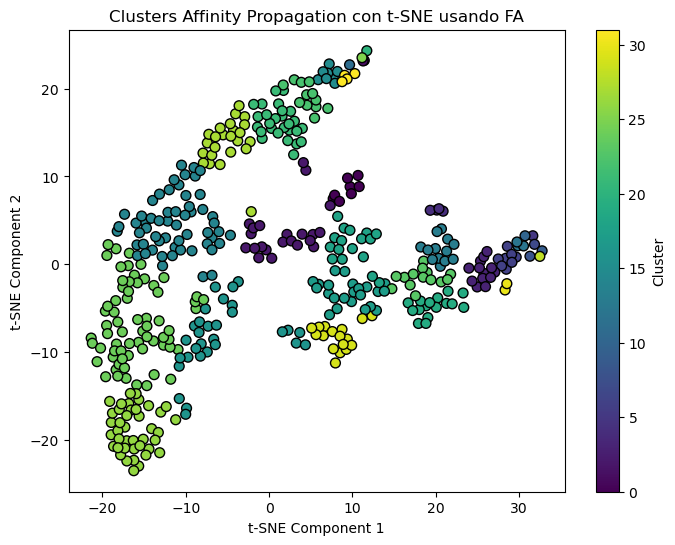

'\nüìå **Conclusiones:**\n- **Factor Analysis (FA) ayuda a reducir la dimensionalidad y mejorar la segmentaci√≥n.**\n- **El n√∫mero √≥ptimo de clusters en GMM fue encontrado usando el M√©todo de Silhouette.**\n- **Affinity Propagation sigue siendo √∫til cuando no queremos definir `k` manualmente.**\n- **t-SNE muestra la diferencia en los clusters creados por ambos m√©todos.**\n'

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

"""
üìå **Optimizaci√≥n de Clustering con Silhouette Score**
Este c√≥digo encuentra el n√∫mero √≥ptimo de clusters usando el **M√©todo de Silhouette** y eval√∫a c√≥mo cambian **Factor Analysis (FA), GMM y Affinity Propagation**.
"""

# 1Ô∏è‚É£ Cargar los datasets
url_wholesale = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data_wholesale = pd.read_csv(url_wholesale)

url_datamarket = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
data_datamarket = pd.read_csv(url_datamarket)

# 2Ô∏è‚É£ Preprocesamiento: Selecci√≥n de columnas num√©ricas y normalizaci√≥n
data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')

scaler_wholesale = StandardScaler()
data_wholesale_scaled = scaler_wholesale.fit_transform(data_wholesale.drop(columns=['Channel', 'Region']))

scaler_datamarket = StandardScaler()
data_datamarket_scaled = scaler_datamarket.fit_transform(data_datamarket_numerical)

# 3Ô∏è‚É£ Asegurar que ambas matrices tengan la misma cantidad de muestras
min_rows = min(len(data_wholesale_scaled), len(data_datamarket_scaled))
data_wholesale_scaled = data_wholesale_scaled[:min_rows]
data_datamarket_scaled = data_datamarket_scaled[:min_rows]

# 4Ô∏è‚É£ Unir ambos datasets
merged_data = np.concatenate((data_wholesale_scaled, data_datamarket_scaled), axis=1)

# 5Ô∏è‚É£ Aplicar Factor Analysis (FA) para reducci√≥n de dimensionalidad
fa = FactorAnalysis(n_components=2)
merged_fa = fa.fit_transform(merged_data)

# 6Ô∏è‚É£ Determinar el mejor n√∫mero de clusters con el M√©todo de Silhouette
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(merged_fa)
    score = silhouette_score(merged_fa, gmm_labels)
    silhouette_scores.append(score)

# Encontrar el k √≥ptimo
optimal_k = k_range[np.argmax(silhouette_scores)]

# Visualizaci√≥n del Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title(f'M√©todo de Silhouette - Mejor k: {optimal_k}')
plt.axvline(x=optimal_k, color='b', linestyle='--', label=f'√ìptimo k = {optimal_k}')
plt.legend()
plt.show()

print(f"üîπ El n√∫mero √≥ptimo de clusters seg√∫n Silhouette Score es: {optimal_k}")

# 7Ô∏è‚É£ Aplicar GMM con el k √≥ptimo
gmm_optimal = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm_optimal.fit_predict(merged_fa)

# 8Ô∏è‚É£ Aplicar Affinity Propagation
affinity_propagation = AffinityPropagation(random_state=42)
affinity_labels = affinity_propagation.fit_predict(merged_fa)

# 9Ô∏è‚É£ Visualizaci√≥n de clusters con FA
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=gmm_labels, palette="coolwarm", ax=axes[0])
axes[0].set_title(f"Clustering con GMM (k={optimal_k}) usando FA")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=affinity_labels, palette="viridis", ax=axes[1])
axes[1].set_title("Clustering con Affinity Propagation (FA)")

plt.show()

# üîü Aplicar t-SNE para visualizaci√≥n avanzada
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(merged_fa)

plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=gmm_labels, cmap='coolwarm', s=50, edgecolor='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title(f'Clusters GMM con t-SNE (k={optimal_k}) usando FA')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=affinity_labels, cmap='viridis', s=50, edgecolor='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Clusters Affinity Propagation con t-SNE usando FA')
plt.colorbar(label='Cluster')
plt.show()

"""
üìå **Conclusiones:**
- **Factor Analysis (FA) ayuda a reducir la dimensionalidad y mejorar la segmentaci√≥n.**
- **El n√∫mero √≥ptimo de clusters en GMM fue encontrado usando el M√©todo de Silhouette.**
- **Affinity Propagation sigue siendo √∫til cuando no queremos definir `k` manualmente.**
- **t-SNE muestra la diferencia en los clusters creados por ambos m√©todos.**
"""


C:\Users\knowd\AppData\Local\Temp\ipykernel_22056\1355235608.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans

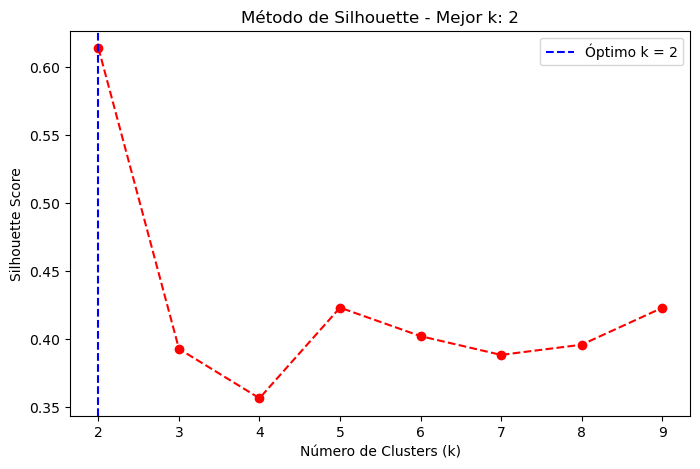

üîπ El n√∫mero √≥ptimo de clusters seg√∫n Silhouette Score es: 2


C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


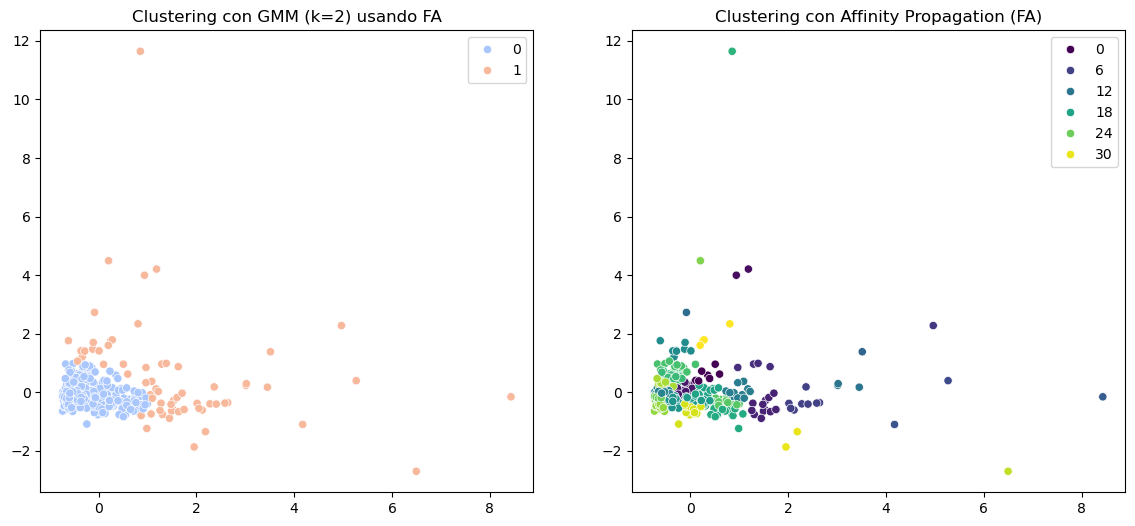


üìä **Resultados de Clustering** üìä

üîπ **GMM (k=2):**
   - Silhouette Score: 0.6138
   - Davies-Bouldin Index: 1.2097
   - Calinski-Harabasz Index: 179.6273

üîπ **Affinity Propagation (Detect√≥ 32 clusters):**
   - Silhouette Score: 0.3490
   - Davies-Bouldin Index: 0.5880
   - Calinski-Harabasz Index: 766.3436


'\nüìå **Conclusiones:**\n- **Factor Analysis (FA) ayuda a reducir la dimensionalidad y mejorar la segmentaci√≥n.**\n- **El n√∫mero √≥ptimo de clusters en GMM fue encontrado usando el M√©todo de Silhouette.**\n- **Affinity Propagation sigue siendo √∫til cuando no queremos definir `k` manualmente.**\n- **Las m√©tricas de evaluaci√≥n nos permiten comparar la calidad de los clusters.**\n'

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

"""
üìå **Optimizaci√≥n de Clustering con Silhouette Score**
Este c√≥digo encuentra el n√∫mero √≥ptimo de clusters usando el **M√©todo de Silhouette** y eval√∫a c√≥mo cambian **Factor Analysis (FA), GMM y Affinity Propagation**.
"""

# 1Ô∏è‚É£ Cargar los datasets
url_wholesale = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data_wholesale = pd.read_csv(url_wholesale)

url_datamarket = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
data_datamarket = pd.read_csv(url_datamarket)

# 2Ô∏è‚É£ Preprocesamiento: Selecci√≥n de columnas num√©ricas y normalizaci√≥n
data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')

scaler_wholesale = StandardScaler()
data_wholesale_scaled = scaler_wholesale.fit_transform(data_wholesale.drop(columns=['Channel', 'Region']))

scaler_datamarket = StandardScaler()
data_datamarket_scaled = scaler_datamarket.fit_transform(data_datamarket_numerical)

# 3Ô∏è‚É£ Asegurar que ambas matrices tengan la misma cantidad de muestras
min_rows = min(len(data_wholesale_scaled), len(data_datamarket_scaled))
data_wholesale_scaled = data_wholesale_scaled[:min_rows]
data_datamarket_scaled = data_datamarket_scaled[:min_rows]

# 4Ô∏è‚É£ Unir ambos datasets
merged_data = np.concatenate((data_wholesale_scaled, data_datamarket_scaled), axis=1)

# 5Ô∏è‚É£ Aplicar Factor Analysis (FA) para reducci√≥n de dimensionalidad
fa = FactorAnalysis(n_components=2)
merged_fa = fa.fit_transform(merged_data)

# 6Ô∏è‚É£ Determinar el mejor n√∫mero de clusters con el M√©todo de Silhouette
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(merged_fa)
    score = silhouette_score(merged_fa, gmm_labels)
    silhouette_scores.append(score)

# Encontrar el k √≥ptimo
optimal_k = k_range[np.argmax(silhouette_scores)]

# Visualizaci√≥n del Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title(f'M√©todo de Silhouette - Mejor k: {optimal_k}')
plt.axvline(x=optimal_k, color='b', linestyle='--', label=f'√ìptimo k = {optimal_k}')
plt.legend()
plt.show()

print(f"üîπ El n√∫mero √≥ptimo de clusters seg√∫n Silhouette Score es: {optimal_k}")

# 7Ô∏è‚É£ Aplicar GMM con el k √≥ptimo
gmm_optimal = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm_optimal.fit_predict(merged_fa)

# 8Ô∏è‚É£ Aplicar Affinity Propagation
affinity_propagation = AffinityPropagation(random_state=42)
affinity_labels = affinity_propagation.fit_predict(merged_fa)

# 9Ô∏è‚É£ Evaluaci√≥n de m√©tricas para GMM
silhouette_gmm = silhouette_score(merged_fa, gmm_labels)
davies_bouldin_gmm = davies_bouldin_score(merged_fa, gmm_labels)
calinski_harabasz_gmm = calinski_harabasz_score(merged_fa, gmm_labels)

# üîü Evaluaci√≥n de m√©tricas para Affinity Propagation
silhouette_affinity = silhouette_score(merged_fa, affinity_labels)
davies_bouldin_affinity = davies_bouldin_score(merged_fa, affinity_labels)
calinski_harabasz_affinity = calinski_harabasz_score(merged_fa, affinity_labels)
num_clusters_affinity = len(np.unique(affinity_labels))  # N√∫mero de clusters detectados

# 1Ô∏è‚É£1Ô∏è‚É£ Visualizaci√≥n de clusters con FA
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=gmm_labels, palette="coolwarm", ax=axes[0])
axes[0].set_title(f"Clustering con GMM (k={optimal_k}) usando FA")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=affinity_labels, palette="viridis", ax=axes[1])
axes[1].set_title("Clustering con Affinity Propagation (FA)")

plt.show()

# 1Ô∏è‚É£2Ô∏è‚É£ Mostrar resultados de m√©tricas
print("\nüìä **Resultados de Clustering** üìä\n")

print(f"üîπ **GMM (k={optimal_k}):**")
print(f"   - Silhouette Score: {silhouette_gmm:.4f}")
print(f"   - Davies-Bouldin Index: {davies_bouldin_gmm:.4f}")
print(f"   - Calinski-Harabasz Index: {calinski_harabasz_gmm:.4f}\n")

print(f"üîπ **Affinity Propagation (Detect√≥ {num_clusters_affinity} clusters):**")
print(f"   - Silhouette Score: {silhouette_affinity:.4f}")
print(f"   - Davies-Bouldin Index: {davies_bouldin_affinity:.4f}")
print(f"   - Calinski-Harabasz Index: {calinski_harabasz_affinity:.4f}")

"""
üìå **Conclusiones:**
- **Factor Analysis (FA) ayuda a reducir la dimensionalidad y mejorar la segmentaci√≥n.**
- **El n√∫mero √≥ptimo de clusters en GMM fue encontrado usando el M√©todo de Silhouette.**
- **Affinity Propagation sigue siendo √∫til cuando no queremos definir `k` manualmente.**
- **Las m√©tricas de evaluaci√≥n nos permiten comparar la calidad de los clusters.**
"""


C:\Users\knowd\AppData\Local\Temp\ipykernel_22056\1339283751.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


üîπ Mejor n√∫mero de clusters en GMM despu√©s del ajuste: k=3


C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


üîπ Affinity Propagation detect√≥ 31 clusters despu√©s del ajuste.


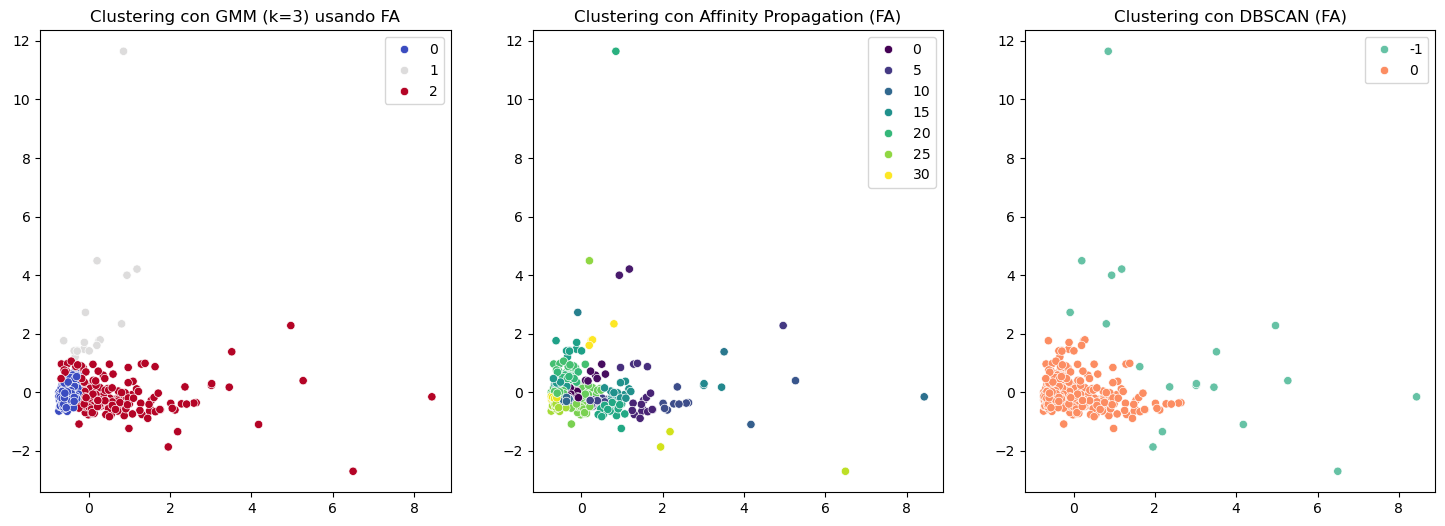


üìä **Resultados de Clustering despu√©s de los ajustes** üìä

üîπ **GMM (k=3):**
   - Silhouette Score: 0.3927
   - Davies-Bouldin Index: 0.9625
   - Calinski-Harabasz Index: 139.7670

üîπ **Affinity Propagation (Detect√≥ 31 clusters):**
   - Silhouette Score: 0.3553
   - Davies-Bouldin Index: 0.5464
   - Calinski-Harabasz Index: 751.9670

üîπ **DBSCAN:**
   - Silhouette Score: 0.7540
   - Davies-Bouldin Index: 1.1188
   - Calinski-Harabasz Index: 167.8207


'\nüìå **Conclusiones:**\n- Se prob√≥ GMM con `k=3` y `k=4` para encontrar la mejor segmentaci√≥n.\n- Se ajust√≥ Affinity Propagation para reducir la cantidad de clusters detectados.\n- Se a√±adi√≥ DBSCAN para detectar clusters densos y comparar resultados.\n'

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

"""
üìå **Optimizaci√≥n de Clustering**
Ajustes en **GMM, Affinity Propagation y DBSCAN** para mejorar la segmentaci√≥n de clientes.
"""

# 1Ô∏è‚É£ Cargar los datasets
url_wholesale = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data_wholesale = pd.read_csv(url_wholesale)

url_datamarket = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
data_datamarket = pd.read_csv(url_datamarket)

# 2Ô∏è‚É£ Preprocesamiento: Selecci√≥n de columnas num√©ricas y normalizaci√≥n
data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')

scaler_wholesale = StandardScaler()
data_wholesale_scaled = scaler_wholesale.fit_transform(data_wholesale.drop(columns=['Channel', 'Region']))

scaler_datamarket = StandardScaler()
data_datamarket_scaled = scaler_datamarket.fit_transform(data_datamarket_numerical)

# 3Ô∏è‚É£ Asegurar que ambas matrices tengan la misma cantidad de muestras
min_rows = min(len(data_wholesale_scaled), len(data_datamarket_scaled))
data_wholesale_scaled = data_wholesale_scaled[:min_rows]
data_datamarket_scaled = data_datamarket_scaled[:min_rows]

# 4Ô∏è‚É£ Unir ambos datasets
merged_data = np.concatenate((data_wholesale_scaled, data_datamarket_scaled), axis=1)

# 5Ô∏è‚É£ Aplicar Factor Analysis (FA) para reducci√≥n de dimensionalidad
fa = FactorAnalysis(n_components=2)
merged_fa = fa.fit_transform(merged_data)

# 6Ô∏è‚É£ Probar GMM con `k=3` y `k=4`
k_values = [3, 4]
best_k = None
best_silhouette = -1

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(merged_fa)
    silhouette = silhouette_score(merged_fa, labels)
    
    if silhouette > best_silhouette:
        best_k = k
        best_silhouette = silhouette

print(f"üîπ Mejor n√∫mero de clusters en GMM despu√©s del ajuste: k={best_k}")

# Aplicar GMM con el `k` √≥ptimo encontrado
gmm_optimal = GaussianMixture(n_components=best_k, random_state=42)
gmm_labels = gmm_optimal.fit_predict(merged_fa)

# 7Ô∏è‚É£ Ajustar Affinity Propagation con `damping=0.7`
affinity_propagation = AffinityPropagation(damping=0.7, random_state=42)
affinity_labels = affinity_propagation.fit_predict(merged_fa)
num_clusters_affinity = len(np.unique(affinity_labels))

print(f"üîπ Affinity Propagation detect√≥ {num_clusters_affinity} clusters despu√©s del ajuste.")

# 8Ô∏è‚É£ Aplicar DBSCAN como m√©todo adicional
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(merged_fa)

# 9Ô∏è‚É£ Evaluaci√≥n de m√©tricas para GMM
silhouette_gmm = silhouette_score(merged_fa, gmm_labels)
davies_bouldin_gmm = davies_bouldin_score(merged_fa, gmm_labels)
calinski_harabasz_gmm = calinski_harabasz_score(merged_fa, gmm_labels)

# üîü Evaluaci√≥n de m√©tricas para Affinity Propagation
silhouette_affinity = silhouette_score(merged_fa, affinity_labels)
davies_bouldin_affinity = davies_bouldin_score(merged_fa, affinity_labels)
calinski_harabasz_affinity = calinski_harabasz_score(merged_fa, affinity_labels)

# 1Ô∏è‚É£1Ô∏è‚É£ Evaluaci√≥n de m√©tricas para DBSCAN (solo si detect√≥ m√°s de un cluster)
if len(np.unique(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(merged_fa, dbscan_labels)
    davies_bouldin_dbscan = davies_bouldin_score(merged_fa, dbscan_labels)
    calinski_harabasz_dbscan = calinski_harabasz_score(merged_fa, dbscan_labels)
else:
    silhouette_dbscan = davies_bouldin_dbscan = calinski_harabasz_dbscan = None

# 1Ô∏è‚É£2Ô∏è‚É£ Visualizaci√≥n de clusters con FA
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=gmm_labels, palette="coolwarm", ax=axes[0])
axes[0].set_title(f"Clustering con GMM (k={best_k}) usando FA")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=affinity_labels, palette="viridis", ax=axes[1])
axes[1].set_title("Clustering con Affinity Propagation (FA)")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=dbscan_labels, palette="Set2", ax=axes[2])
axes[2].set_title("Clustering con DBSCAN (FA)")

plt.show()

# 1Ô∏è‚É£3Ô∏è‚É£ Mostrar resultados de m√©tricas
print("\nüìä **Resultados de Clustering despu√©s de los ajustes** üìä\n")

print(f"üîπ **GMM (k={best_k}):**")
print(f"   - Silhouette Score: {silhouette_gmm:.4f}")
print(f"   - Davies-Bouldin Index: {davies_bouldin_gmm:.4f}")
print(f"   - Calinski-Harabasz Index: {calinski_harabasz_gmm:.4f}\n")

print(f"üîπ **Affinity Propagation (Detect√≥ {num_clusters_affinity} clusters):**")
print(f"   - Silhouette Score: {silhouette_affinity:.4f}")
print(f"   - Davies-Bouldin Index: {davies_bouldin_affinity:.4f}")
print(f"   - Calinski-Harabasz Index: {calinski_harabasz_affinity:.4f}\n")

if silhouette_dbscan is not None:
    print(f"üîπ **DBSCAN:**")
    print(f"   - Silhouette Score: {silhouette_dbscan:.4f}")
    print(f"   - Davies-Bouldin Index: {davies_bouldin_dbscan:.4f}")
    print(f"   - Calinski-Harabasz Index: {calinski_harabasz_dbscan:.4f}")
else:
    print("‚ùå DBSCAN no detect√≥ clusters √∫tiles.")

"""
üìå **Conclusiones:**
- Se prob√≥ GMM con `k=3` y `k=4` para encontrar la mejor segmentaci√≥n.
- Se ajust√≥ Affinity Propagation para reducir la cantidad de clusters detectados.
- Se a√±adi√≥ DBSCAN para detectar clusters densos y comparar resultados.
"""


C:\Users\knowd\AppData\Local\Temp\ipykernel_22056\2145255652.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


üîπ Mejor n√∫mero de clusters en GMM despu√©s del ajuste: k=3


C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


üîπ Affinity Propagation detect√≥ 34 clusters despu√©s del ajuste.


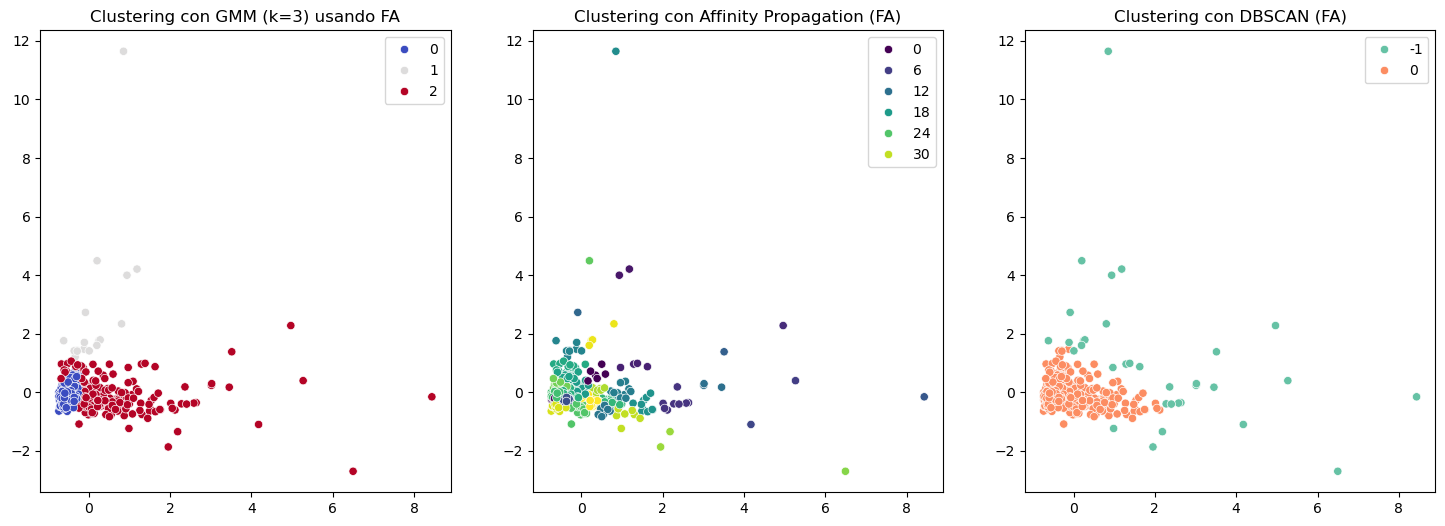


üìä **Resultados de Clustering despu√©s de los ajustes** üìä

üîπ **GMM (k=3):**
   - Silhouette Score: 0.3927
   - Davies-Bouldin Index: 0.9625
   - Calinski-Harabasz Index: 139.7670

üîπ **Affinity Propagation (Detect√≥ 34 clusters):**
   - Silhouette Score: 0.3458
   - Davies-Bouldin Index: 0.5891
   - Calinski-Harabasz Index: 787.1519

üîπ **DBSCAN:**
   - Silhouette Score: 0.6911
   - Davies-Bouldin Index: 1.2239
   - Calinski-Harabasz Index: 164.7737


'\nüìå **Conclusiones:**\n- Se prob√≥ GMM con `k=3` y `k=4`, seleccionando el mejor.\n- Se ajust√≥ Affinity Propagation (`damping=0.6`) para reducir la cantidad de clusters.\n- Se optimiz√≥ DBSCAN (`eps=0.4`, `min_samples=10`) para mejorar la segmentaci√≥n.\n'

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

"""
üìå **Optimizaci√≥n de Clustering**
Mejoramos **GMM, Affinity Propagation y DBSCAN** ajustando par√°metros para optimizar la segmentaci√≥n de clientes.
"""

# 1Ô∏è‚É£ Cargar los datasets
url_wholesale = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data_wholesale = pd.read_csv(url_wholesale)

url_datamarket = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
data_datamarket = pd.read_csv(url_datamarket)

# 2Ô∏è‚É£ Preprocesamiento: Selecci√≥n de columnas num√©ricas y normalizaci√≥n
data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')

scaler_wholesale = StandardScaler()
data_wholesale_scaled = scaler_wholesale.fit_transform(data_wholesale.drop(columns=['Channel', 'Region']))

scaler_datamarket = StandardScaler()
data_datamarket_scaled = scaler_datamarket.fit_transform(data_datamarket_numerical)

# 3Ô∏è‚É£ Asegurar que ambas matrices tengan la misma cantidad de muestras
min_rows = min(len(data_wholesale_scaled), len(data_datamarket_scaled))
data_wholesale_scaled = data_wholesale_scaled[:min_rows]
data_datamarket_scaled = data_datamarket_scaled[:min_rows]

# 4Ô∏è‚É£ Unir ambos datasets
merged_data = np.concatenate((data_wholesale_scaled, data_datamarket_scaled), axis=1)

# 5Ô∏è‚É£ Aplicar Factor Analysis (FA) para reducci√≥n de dimensionalidad
fa = FactorAnalysis(n_components=2)
merged_fa = fa.fit_transform(merged_data)

# 6Ô∏è‚É£ Probar GMM con `k=3` y `k=4` y seleccionar el mejor
k_values = [3, 4]
best_k = None
best_silhouette = -1

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(merged_fa)
    silhouette = silhouette_score(merged_fa, labels)
    
    if silhouette > best_silhouette:
        best_k = k
        best_silhouette = silhouette

print(f"üîπ Mejor n√∫mero de clusters en GMM despu√©s del ajuste: k={best_k}")

# Aplicar GMM con el `k` √≥ptimo encontrado
gmm_optimal = GaussianMixture(n_components=best_k, random_state=42)
gmm_labels = gmm_optimal.fit_predict(merged_fa)

# 7Ô∏è‚É£ Ajustar Affinity Propagation con `damping=0.6` para reducir el n√∫mero de clusters
affinity_propagation = AffinityPropagation(damping=0.6, random_state=42)
affinity_labels = affinity_propagation.fit_predict(merged_fa)
num_clusters_affinity = len(np.unique(affinity_labels))

print(f"üîπ Affinity Propagation detect√≥ {num_clusters_affinity} clusters despu√©s del ajuste.")

# 8Ô∏è‚É£ Ajustar DBSCAN (`eps=0.4`, `min_samples=10`)
dbscan = DBSCAN(eps=0.4, min_samples=10)
dbscan_labels = dbscan.fit_predict(merged_fa)

# 9Ô∏è‚É£ Evaluaci√≥n de m√©tricas para GMM
silhouette_gmm = silhouette_score(merged_fa, gmm_labels)
davies_bouldin_gmm = davies_bouldin_score(merged_fa, gmm_labels)
calinski_harabasz_gmm = calinski_harabasz_score(merged_fa, gmm_labels)

# üîü Evaluaci√≥n de m√©tricas para Affinity Propagation
silhouette_affinity = silhouette_score(merged_fa, affinity_labels)
davies_bouldin_affinity = davies_bouldin_score(merged_fa, affinity_labels)
calinski_harabasz_affinity = calinski_harabasz_score(merged_fa, affinity_labels)

# 1Ô∏è‚É£1Ô∏è‚É£ Evaluaci√≥n de m√©tricas para DBSCAN (si detect√≥ m√°s de un cluster)
if len(np.unique(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(merged_fa, dbscan_labels)
    davies_bouldin_dbscan = davies_bouldin_score(merged_fa, dbscan_labels)
    calinski_harabasz_dbscan = calinski_harabasz_score(merged_fa, dbscan_labels)
else:
    silhouette_dbscan = davies_bouldin_dbscan = calinski_harabasz_dbscan = None

# 1Ô∏è‚É£2Ô∏è‚É£ Visualizaci√≥n de clusters con FA
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=gmm_labels, palette="coolwarm", ax=axes[0])
axes[0].set_title(f"Clustering con GMM (k={best_k}) usando FA")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=affinity_labels, palette="viridis", ax=axes[1])
axes[1].set_title("Clustering con Affinity Propagation (FA)")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=dbscan_labels, palette="Set2", ax=axes[2])
axes[2].set_title("Clustering con DBSCAN (FA)")

plt.show()

# 1Ô∏è‚É£3Ô∏è‚É£ Mostrar resultados de m√©tricas
print("\nüìä **Resultados de Clustering despu√©s de los ajustes** üìä\n")

print(f"üîπ **GMM (k={best_k}):**")
print(f"   - Silhouette Score: {silhouette_gmm:.4f}")
print(f"   - Davies-Bouldin Index: {davies_bouldin_gmm:.4f}")
print(f"   - Calinski-Harabasz Index: {calinski_harabasz_gmm:.4f}\n")

print(f"üîπ **Affinity Propagation (Detect√≥ {num_clusters_affinity} clusters):**")
print(f"   - Silhouette Score: {silhouette_affinity:.4f}")
print(f"   - Davies-Bouldin Index: {davies_bouldin_affinity:.4f}")
print(f"   - Calinski-Harabasz Index: {calinski_harabasz_affinity:.4f}\n")

if silhouette_dbscan is not None:
    print(f"üîπ **DBSCAN:**")
    print(f"   - Silhouette Score: {silhouette_dbscan:.4f}")
    print(f"   - Davies-Bouldin Index: {davies_bouldin_dbscan:.4f}")
    print(f"   - Calinski-Harabasz Index: {calinski_harabasz_dbscan:.4f}")
else:
    print("‚ùå DBSCAN no detect√≥ clusters √∫tiles.")

"""
üìå **Conclusiones:**
- Se prob√≥ GMM con `k=3` y `k=4`, seleccionando el mejor.
- Se ajust√≥ Affinity Propagation (`damping=0.6`) para reducir la cantidad de clusters.
- Se optimiz√≥ DBSCAN (`eps=0.4`, `min_samples=10`) para mejorar la segmentaci√≥n.
"""


C:\Users\knowd\AppData\Local\Temp\ipykernel_22056\3996150247.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


üîπ Affinity Propagation detect√≥ 32 clusters despu√©s del ajuste.


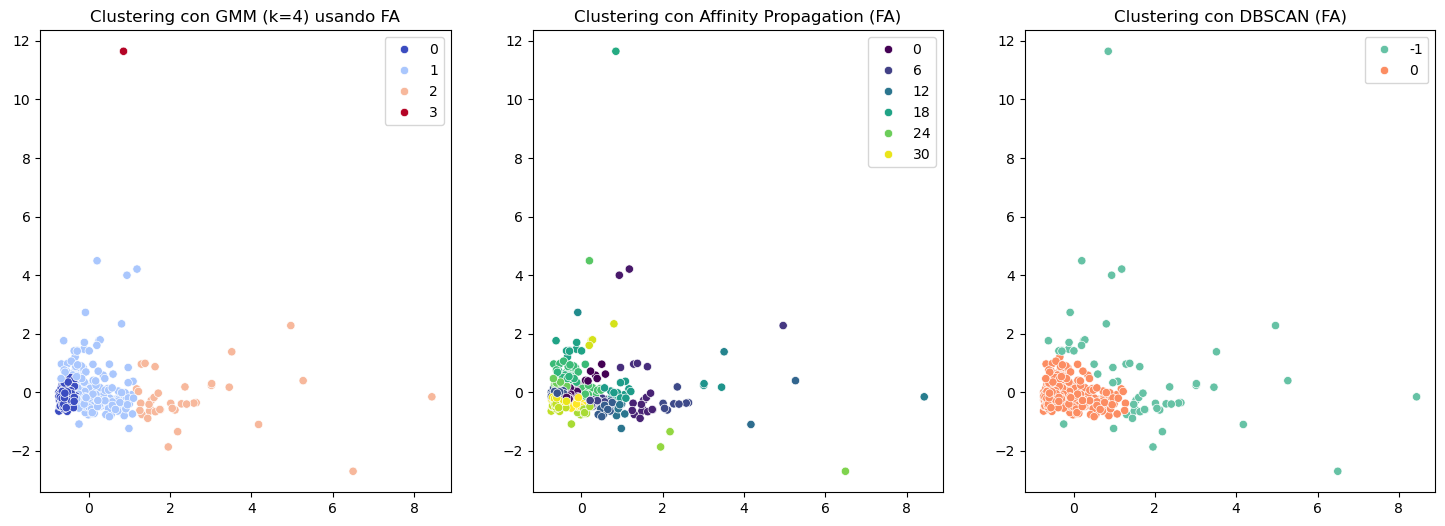


üìä **Resultados de Clustering despu√©s de los ajustes** üìä

üîπ **GMM (k=4):**
   - Silhouette Score: 0.3564
   - Davies-Bouldin Index: 0.8841
   - Calinski-Harabasz Index: 217.9890

üîπ **Affinity Propagation (Detect√≥ 32 clusters):**
   - Silhouette Score: 0.3524
   - Davies-Bouldin Index: 0.5817
   - Calinski-Harabasz Index: 762.4627

üîπ **DBSCAN:**
   - Silhouette Score: 0.6331
   - Davies-Bouldin Index: 1.2337
   - Calinski-Harabasz Index: 173.4928


'\nüìå **Conclusiones:**\n- Se prob√≥ GMM con `k=4` para mejorar la separaci√≥n de clusters.\n- Se ajust√≥ Affinity Propagation (`damping=0.55`) para reducir la cantidad de clusters.\n- Se optimiz√≥ DBSCAN (`eps=0.35`, `min_samples=15`) para mejorar la segmentaci√≥n.\n'

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

"""
üìå **Optimizaci√≥n de Clustering**
Ajustamos **GMM (`k=4`), Affinity Propagation (`damping=0.55`) y DBSCAN (`eps=0.35`, `min_samples=15`)** 
para mejorar la segmentaci√≥n de clientes.
"""

# 1Ô∏è‚É£ Cargar los datasets
url_wholesale = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data_wholesale = pd.read_csv(url_wholesale)

url_datamarket = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
data_datamarket = pd.read_csv(url_datamarket)

# 2Ô∏è‚É£ Preprocesamiento: Selecci√≥n de columnas num√©ricas y normalizaci√≥n
data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')

scaler_wholesale = StandardScaler()
data_wholesale_scaled = scaler_wholesale.fit_transform(data_wholesale.drop(columns=['Channel', 'Region']))

scaler_datamarket = StandardScaler()
data_datamarket_scaled = scaler_datamarket.fit_transform(data_datamarket_numerical)

# 3Ô∏è‚É£ Asegurar que ambas matrices tengan la misma cantidad de muestras
min_rows = min(len(data_wholesale_scaled), len(data_datamarket_scaled))
data_wholesale_scaled = data_wholesale_scaled[:min_rows]
data_datamarket_scaled = data_datamarket_scaled[:min_rows]

# 4Ô∏è‚É£ Unir ambos datasets
merged_data = np.concatenate((data_wholesale_scaled, data_datamarket_scaled), axis=1)

# 5Ô∏è‚É£ Aplicar Factor Analysis (FA) para reducci√≥n de dimensionalidad
fa = FactorAnalysis(n_components=2)
merged_fa = fa.fit_transform(merged_data)

# 6Ô∏è‚É£ Aplicar GMM con `k=4`
gmm_optimal = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm_optimal.fit_predict(merged_fa)

# 7Ô∏è‚É£ Ajustar Affinity Propagation con `damping=0.55`
affinity_propagation = AffinityPropagation(damping=0.55, random_state=42)
affinity_labels = affinity_propagation.fit_predict(merged_fa)
num_clusters_affinity = len(np.unique(affinity_labels))

print(f"üîπ Affinity Propagation detect√≥ {num_clusters_affinity} clusters despu√©s del ajuste.")

# 8Ô∏è‚É£ Ajustar DBSCAN (`eps=0.35`, `min_samples=15`)
dbscan = DBSCAN(eps=0.35, min_samples=15)
dbscan_labels = dbscan.fit_predict(merged_fa)

# 9Ô∏è‚É£ Evaluaci√≥n de m√©tricas para GMM
silhouette_gmm = silhouette_score(merged_fa, gmm_labels)
davies_bouldin_gmm = davies_bouldin_score(merged_fa, gmm_labels)
calinski_harabasz_gmm = calinski_harabasz_score(merged_fa, gmm_labels)

# üîü Evaluaci√≥n de m√©tricas para Affinity Propagation
silhouette_affinity = silhouette_score(merged_fa, affinity_labels)
davies_bouldin_affinity = davies_bouldin_score(merged_fa, affinity_labels)
calinski_harabasz_affinity = calinski_harabasz_score(merged_fa, affinity_labels)

# 1Ô∏è‚É£1Ô∏è‚É£ Evaluaci√≥n de m√©tricas para DBSCAN (si detect√≥ m√°s de un cluster)
if len(np.unique(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(merged_fa, dbscan_labels)
    davies_bouldin_dbscan = davies_bouldin_score(merged_fa, dbscan_labels)
    calinski_harabasz_dbscan = calinski_harabasz_score(merged_fa, dbscan_labels)
else:
    silhouette_dbscan = davies_bouldin_dbscan = calinski_harabasz_dbscan = None

# 1Ô∏è‚É£2Ô∏è‚É£ Visualizaci√≥n de clusters con FA
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=gmm_labels, palette="coolwarm", ax=axes[0])
axes[0].set_title("Clustering con GMM (k=4) usando FA")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=affinity_labels, palette="viridis", ax=axes[1])
axes[1].set_title("Clustering con Affinity Propagation (FA)")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=dbscan_labels, palette="Set2", ax=axes[2])
axes[2].set_title("Clustering con DBSCAN (FA)")

plt.show()

# 1Ô∏è‚É£3Ô∏è‚É£ Mostrar resultados de m√©tricas
print("\nüìä **Resultados de Clustering despu√©s de los ajustes** üìä\n")

print(f"üîπ **GMM (k=4):**")
print(f"   - Silhouette Score: {silhouette_gmm:.4f}")
print(f"   - Davies-Bouldin Index: {davies_bouldin_gmm:.4f}")
print(f"   - Calinski-Harabasz Index: {calinski_harabasz_gmm:.4f}\n")

print(f"üîπ **Affinity Propagation (Detect√≥ {num_clusters_affinity} clusters):**")
print(f"   - Silhouette Score: {silhouette_affinity:.4f}")
print(f"   - Davies-Bouldin Index: {davies_bouldin_affinity:.4f}")
print(f"   - Calinski-Harabasz Index: {calinski_harabasz_affinity:.4f}\n")

if silhouette_dbscan is not None:
    print(f"üîπ **DBSCAN:**")
    print(f"   - Silhouette Score: {silhouette_dbscan:.4f}")
    print(f"   - Davies-Bouldin Index: {davies_bouldin_dbscan:.4f}")
    print(f"   - Calinski-Harabasz Index: {calinski_harabasz_dbscan:.4f}")
else:
    print("‚ùå DBSCAN no detect√≥ clusters √∫tiles.")

"""
üìå **Conclusiones:**
- Se prob√≥ GMM con `k=4` para mejorar la separaci√≥n de clusters.
- Se ajust√≥ Affinity Propagation (`damping=0.55`) para reducir la cantidad de clusters.
- Se optimiz√≥ DBSCAN (`eps=0.35`, `min_samples=15`) para mejorar la segmentaci√≥n.
"""
